<a href="https://colab.research.google.com/github/himanshuchrist/AI-ML/blob/ML_Lab/Lab3_2348520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore")

In [100]:
#importing dataset
data=pd.read_csv('/content/drive/MyDrive/Market_Basket_Optimisation.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#Loop to find column with only null values and drop the same
data.isna().sum()
for i in data.columns:
  if data[i].isna().sum()==len(data):
    print(i+" column dropped")
    data=data.drop([i],axis=1)

In [102]:
#Chaning NaN values to 0
data=data.fillna(0)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
#converting entire data set into single list
transactions=[]
transactions=data.to_numpy().flatten()
transactions

array(['shrimp', 'almonds', 'avocado', ..., 0, 0, 0], dtype=object)

In [104]:
#Removing all the 0 values
transactions=[x for x in transactions if x!=0]

<Axes: xlabel='0'>

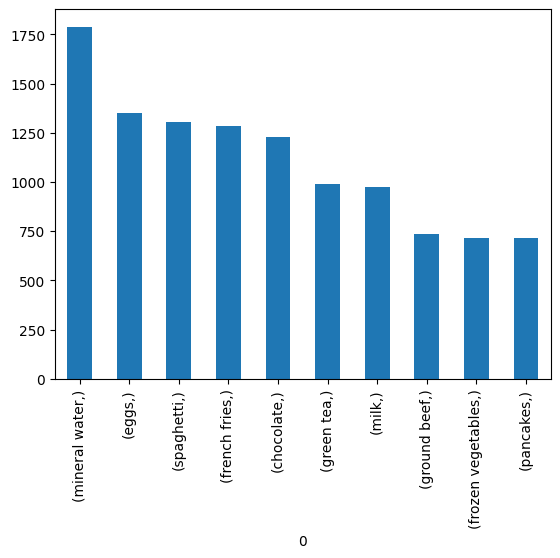

In [105]:
#Sorting values based on frequency and plotting the same
y=pd.DataFrame(transactions)
top=y.value_counts().sort_values(ascending=False)[:10]
top.plot(kind='bar')

In [106]:
#Dropping the first row as it is an outlier
data=data.drop(index=0)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
  #Creating a list of lists based on dataset
  records=[]
  for i in range(0,7500):
    records.append([str(data.values[i,j])for j in range(0,20)])

In [108]:
#Getting all the unique values
items = set()
for col in y:
    items.update(y[col].unique())
print(items)

{'parmesan cheese', 'zucchini', 'cake', 'yams', 'cooking oil', 'cookies', 'babies food', 'meatballs', 'shallot', 'salad', 'white wine', 'candy bars', 'french fries', 'sandwich', 'extra dark chocolate', 'milk', 'french wine', 'carrots', 'eggs', 'green beans', 'fresh tuna', 'tomato juice', 'pancakes', 'toothpaste', 'strong cheese', 'salmon', 'oil', 'whole weat flour', 'light cream', 'soup', 'body spray', 'chocolate bread', 'blueberries', 'antioxydant juice', 'burger sauce', 'clothes accessories', 'frozen smoothie', 'gums', 'vegetables mix', 'frozen vegetables', 'mushroom cream sauce', 'protein bar', 'nonfat milk', 'almonds', 'chutney', 'honey', 'fresh bread', 'tomatoes', 'butter', 'energy drink', 'black tea', 'pasta', 'whole wheat rice', 'shrimp', 'mint', 'tomato sauce', 'green tea', 'cream', 'brownies', 'oatmeal', 'champagne', 'eggplant', 'cottage cheese', 'water spray', 'gluten free bar', 'mayonnaise', 'mineral water', 'turkey', 'bug spray', 'pet food', 'rice', 'green grapes', 'bramble

In [109]:
#Creating dataframe with unique row values and in binary matrix format
itemset = set(items)
encoded_vals = []
for index, row in data.iterrows():
    rowset = set(row)
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)
ohe_df

,parmesan cheese,zucchini,gluten free bar,cake,mayonnaise,yams,mineral water,cooking oil,turkey,cookies,...,brownies,barbecue sauce,oatmeal,champagne,cottage cheese,olive oil,sparkling water,meatballs,eggs,burgers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
#Frequent Items
freq_items = apriori(ohe_df, min_support=0.0045,use_colnames=True)
freq_items.head()

,support,itemsets
0,0.019867,(parmesan cheese)
1,0.009467,(zucchini)
2,0.006933,(gluten free bar)
3,0.081067,(cake)
4,0.006133,(mayonnaise)


In [111]:
#Identifying underlying relations between different items
rules=association_rules(freq_items,metric='confidence',min_threshold=0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(parmesan cheese),(mineral water),0.019867,0.238267,0.004667,0.234899,0.985867,-0.000067,0.995599,-0.014415
1,(parmesan cheese),(spaghetti),0.019867,0.174133,0.006800,0.342282,1.965631,0.003341,1.255654,0.501215
2,(parmesan cheese),(frozen vegetables),0.019867,0.095333,0.005467,0.275168,2.886375,0.003573,1.248105,0.666792
3,(parmesan cheese),(eggs),0.019867,0.179733,0.004533,0.228188,1.269592,0.000963,1.062780,0.216649
4,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,0.008151,1.152074,0.322947


In [112]:
#Best pair choices for store layout
bestchoice=rules.sort_values(by='lift',ascending=False)
print("Best choices are")
print(bestchoice[['antecedents','consequents','lift']][:10])

Best choices are
                        antecedents    consequents      lift
106                   (light cream)      (chicken)  4.843305
102                         (pasta)     (escalope)  4.700185
230                         (pasta)       (shrimp)  4.514494
232             (whole wheat pasta)    (olive oil)  4.130221
604      (spaghetti, herb & pepper)  (ground beef)  4.003826
348  (mineral water, herb & pepper)  (ground beef)  3.975153
147                  (tomato sauce)  (ground beef)  3.840147
101          (mushroom cream sauce)     (escalope)  3.790327
652  (spaghetti, frozen vegetables)     (tomatoes)  3.497580
433           (soup, mineral water)    (olive oil)  3.429516


<Axes: ylabel='lift'>

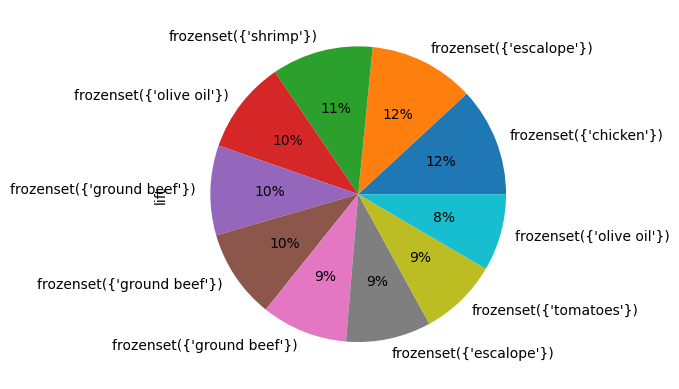

In [113]:
#Plotting most co-purchased item based on consequents
bestchoice=bestchoice.drop_duplicates(subset=['lift'])
bestchoice[:10].plot(kind='pie',y='lift',labels=bestchoice['consequents'],autopct='%1.0f%%',legend=False)

<Axes: >

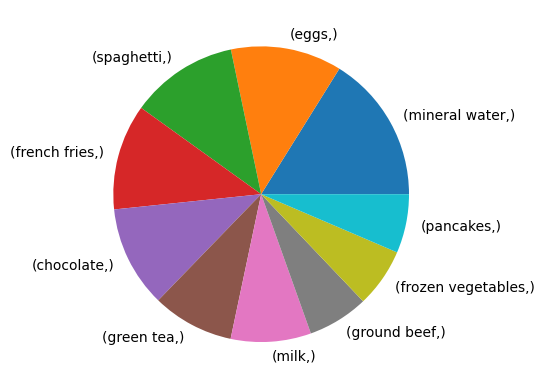

In [114]:
#Plotting most co-purchased item based on original database leaving the first purchased item
copur=data[1:].to_numpy().flatten()
copur=[x for x in copur if x!=0]
y=pd.DataFrame(copur)
top=y.value_counts().sort_values(ascending=False)[:10]
top.plot(kind='pie')

In [115]:
#Making a cross matrix of all items
matrix1=pd.DataFrame(0,columns=list(items),index=list(items))
matrix1

,parmesan cheese,zucchini,cake,yams,cooking oil,cookies,babies food,meatballs,shallot,salad,...,salt,shampoo,cauliflower,red wine,hand protein bar,whole wheat pasta,barbecue sauce,cider,olive oil,sparkling water
parmesan cheese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zucchini,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cooking oil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whole wheat pasta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
barbecue sauce,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cider,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
olive oil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#Appenidng count to cross matrix
for i in records:
  for j in list(items):
    for k in list(items):
      if j in i and k in i and k!=j:
        matrix1[j][k]+=1
        matrix1[k][j]+=1
matrix1

,parmesan cheese,zucchini,cake,yams,cooking oil,cookies,babies food,meatballs,shallot,salad,...,salt,shampoo,cauliflower,red wine,hand protein bar,whole wheat pasta,barbecue sauce,cider,olive oil,sparkling water
parmesan cheese,0,2,46,4,16,12,0,12,4,4,...,6,2,4,14,2,32,2,4,32,2
zucchini,2,0,14,4,22,10,2,0,0,0,...,0,0,0,10,6,8,0,0,20,0
cake,46,14,0,24,74,60,6,28,2,8,...,14,8,6,48,4,54,16,22,98,12
yams,4,4,24,0,16,6,0,0,0,0,...,0,0,0,10,2,18,4,0,14,0
cooking oil,16,22,74,16,0,32,2,14,2,4,...,10,10,8,34,14,34,18,14,76,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
whole wheat pasta,32,8,54,18,34,10,4,24,0,4,...,2,0,4,14,2,0,10,6,120,6
barbecue sauce,2,0,16,4,18,14,2,2,0,2,...,8,2,2,8,0,10,0,2,4,6
cider,4,0,22,0,14,12,0,6,2,0,...,0,2,0,6,2,6,2,0,4,0
olive oil,32,20,98,14,76,24,2,36,8,8,...,16,4,14,36,12,120,4,4,0,8


In [117]:
#Converting the top 10 sold items from set to list
cross=[]
for i in range(0,10):
  cross.append(''.join(letter for letter in str(top.index[i]) if letter.isalnum()))

In [118]:
#Creating cross matrix for top 10 sold items
matrix=pd.DataFrame(0,columns=cross,index=cross)

In [119]:
##Appenidng count to cross matrix
for i in records:
  for j in cross:
    for k in cross:
      if j in i and k in i and k!=j:
        matrix[j][k]+=1
        matrix[k][j]+=1
matrix

,mineralwater,eggs,spaghetti,frenchfries,chocolate,greentea,milk,groundbeef,frozenvegetables,pancakes
mineralwater,0,0,0,0,0,0,0,0,0,0
eggs,0,0,548,0,498,0,462,0,0,326
spaghetti,0,548,0,0,588,0,532,0,0,378
frenchfries,0,0,0,0,0,0,0,0,0,0
chocolate,0,498,588,0,0,0,482,0,0,298
greentea,0,0,0,0,0,0,0,0,0,0
milk,0,462,532,0,482,0,0,0,0,248
groundbeef,0,0,0,0,0,0,0,0,0,0
frozenvegetables,0,0,0,0,0,0,0,0,0,0
pancakes,0,326,378,0,298,0,248,0,0,0


<Axes: >

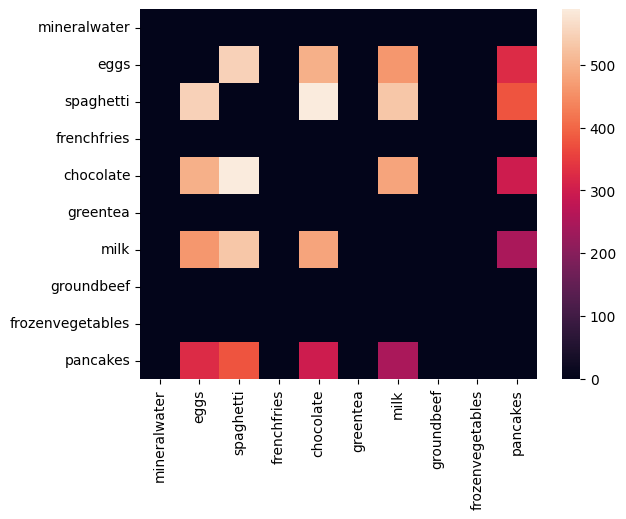

In [120]:
#Showing the strongest relationship between top 10 items sold
sns.heatmap(data=matrix)